# WORKFLOW FOR DIGITIZING LOGS

1. Split PDF
2. Read PDF into img/python
3. Run openCV
4. Export results

## 1. Split pdf

# Turn pdf into png

In [1]:
import numpy as np
import cv2
from imutils.perspective import four_point_transform
from matplotlib import pyplot as plt

from matplotlib import cm

from helper import show_images

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
height = 800
width = 600

image_file = "data/formatted/log_test_1.jpg"

image = cv2.imread(image_file)
image = cv2.resize(image, (width, height))
image1 = image.copy()
image2 = image.copy()
image3 = image.copy()
image4 = image.copy()

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image to gray scale
blur = cv2.GaussianBlur(image, (5, 5), 0) # Add Gaussian blur
edged = cv2.Canny(image, 75, 200) # Apply the Canny algorithm to find the edges

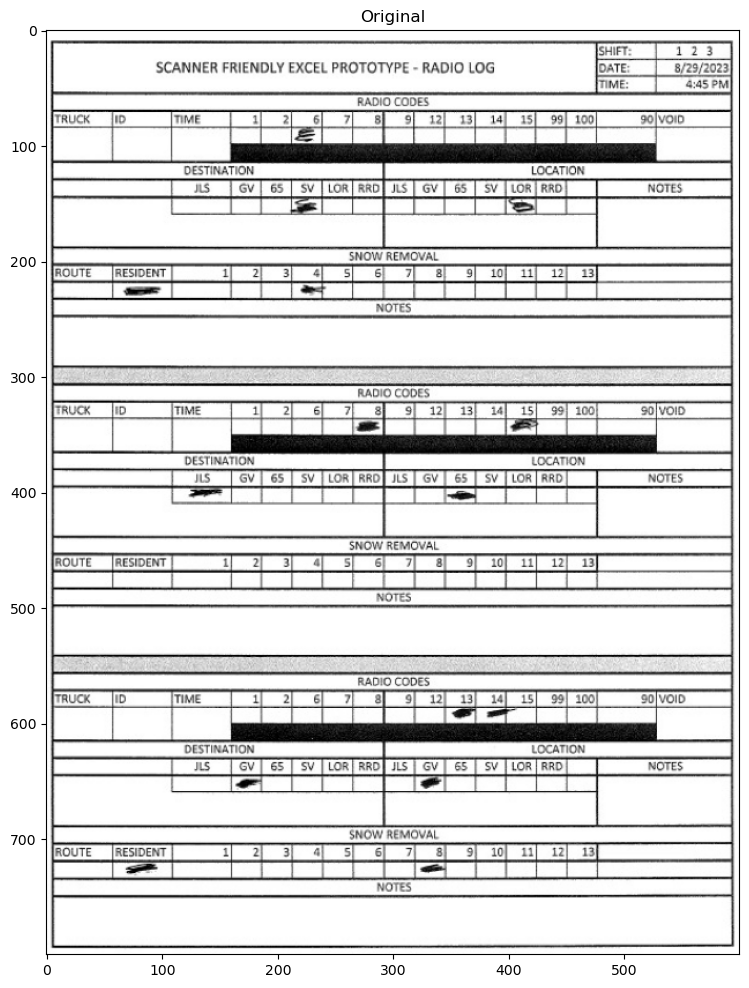

In [5]:
plt.imshow(image)
plt.title('Original')
plt.show()

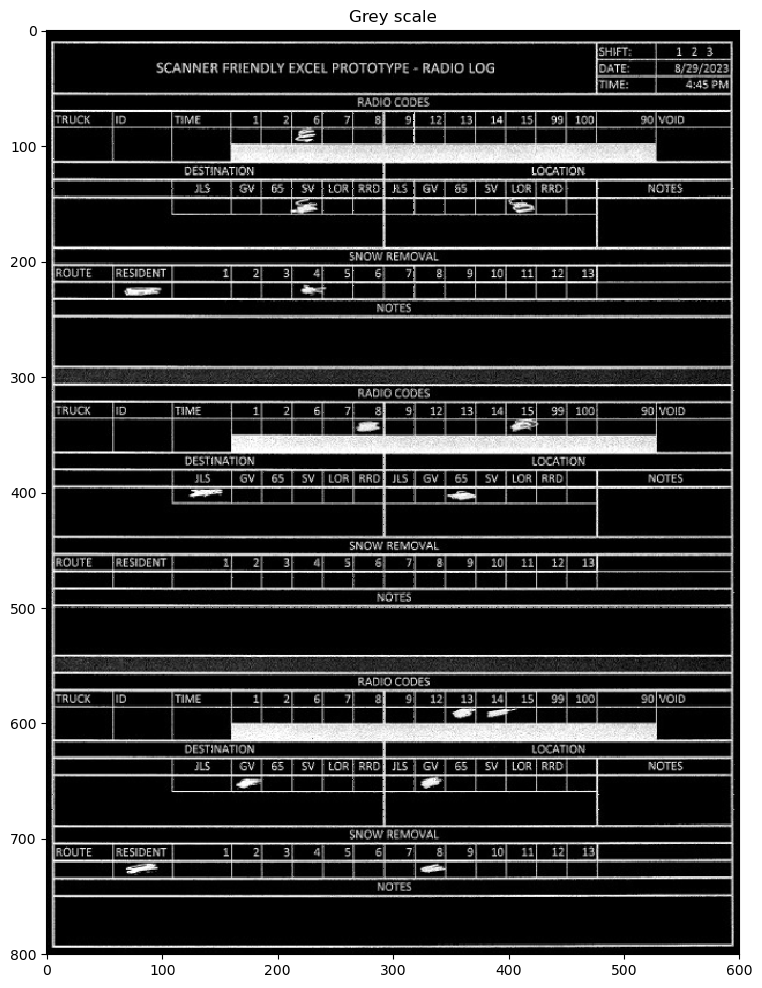

In [6]:
plt.imshow(gray)
plt.pcolor(gray, cmap = cm.binary)
plt.title('Grey scale')
plt.show()

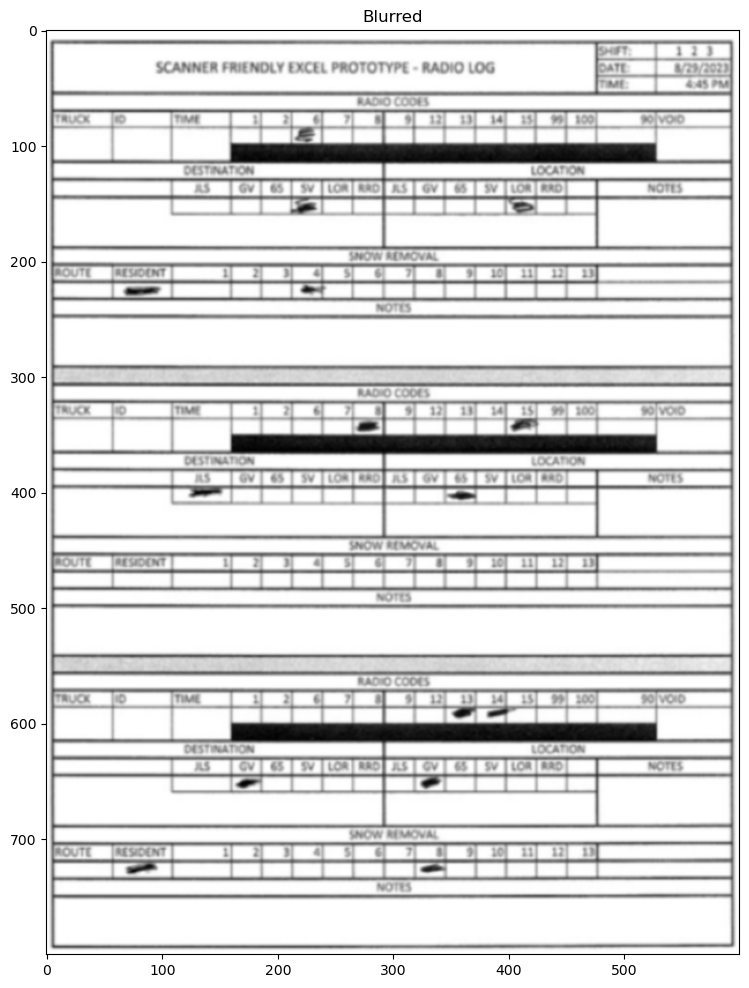

In [7]:
plt.imshow(blur)
plt.title('Blurred')
plt.show()

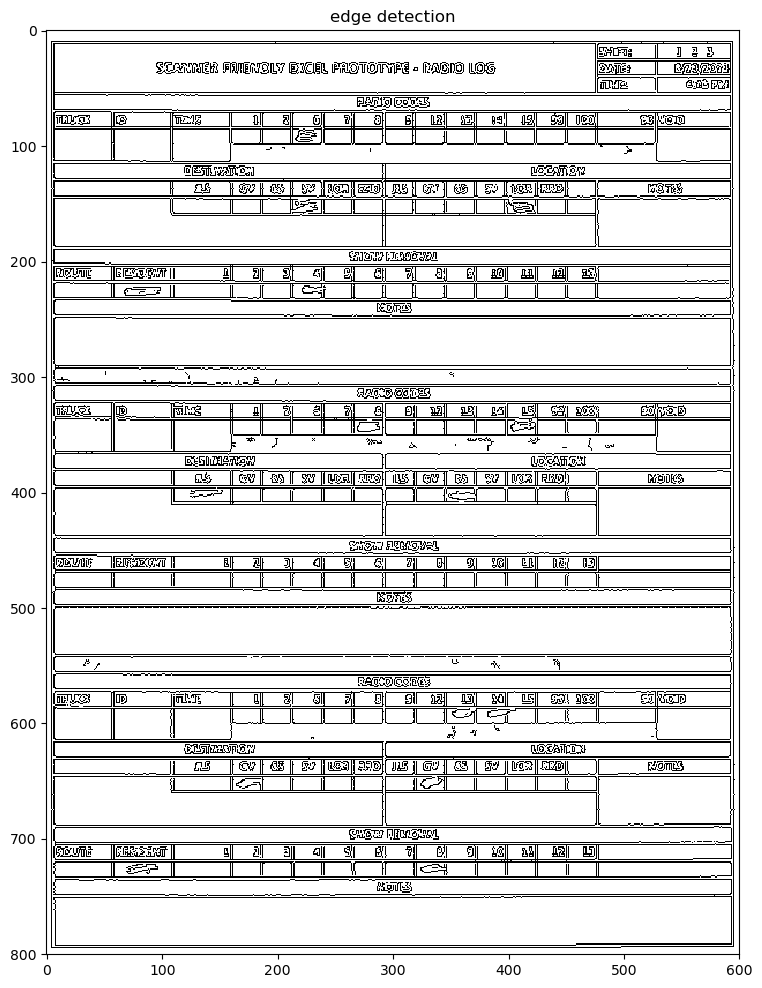

In [8]:
plt.imshow(edged)
plt.pcolor(edged, cmap = cm.binary)
plt.title('edge detection')
plt.show()

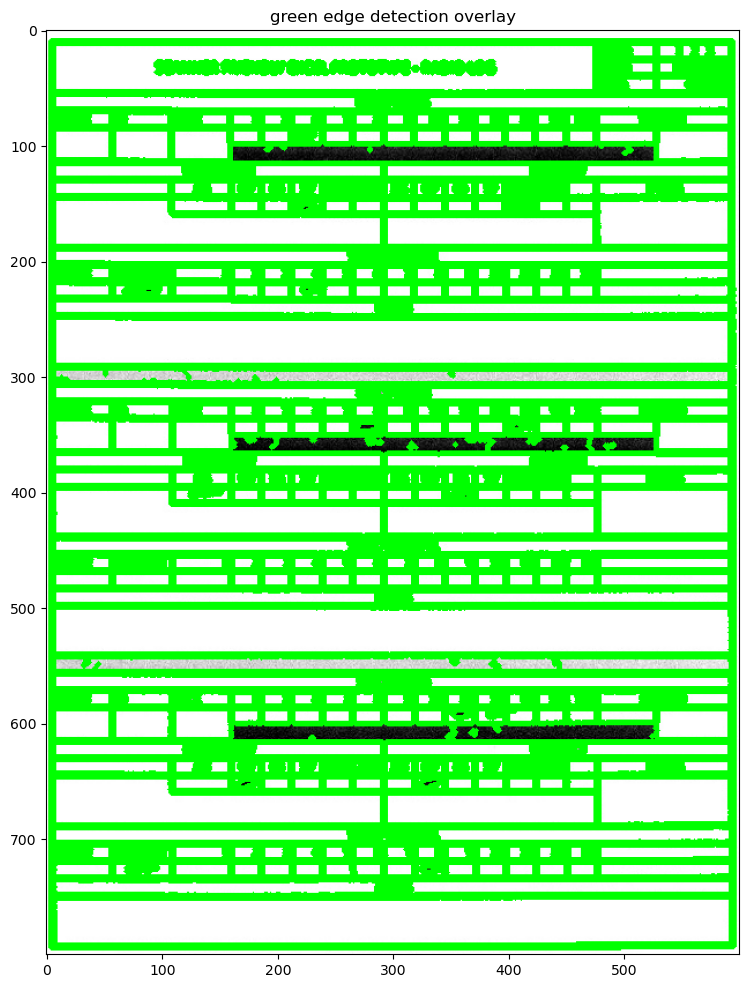

In [9]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

green = (0, 255, 0)

cv2.drawContours(image1, contours, -1, green, 3)
plt.imshow(image1)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay')
plt.show()

In [10]:
def get_rect_cnts(contours):
    rect_cnts = []
    for cnt in contours:
        # approximate the contour
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        # if the approximated contour is a rectangle ...
        if len(approx) == 4:
            # append it to our list
            rect_cnts.append(approx)
    # sort the contours from biggest to smallest
    rect_cnts = sorted(rect_cnts, key=cv2.contourArea, reverse=True)
    
    return rect_cnts

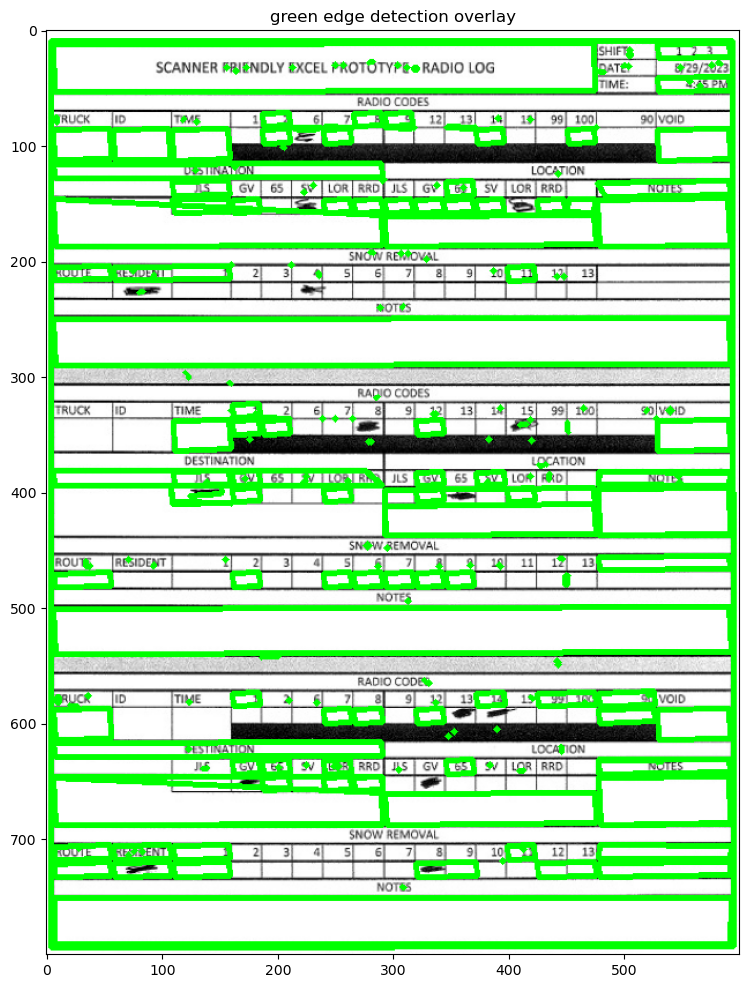

In [11]:
rect_cnts = get_rect_cnts(contours)
# warp perspective to get the top-down view of the document
document = four_point_transform(image2, rect_cnts[0].reshape(4, 2))
document1 = document.copy()  # for display purposes
document2 = document.copy()  # for display purposes
document3 = document.copy()  # for display purposes
document4 = document.copy()  # for display purposes
document5 = document.copy()  # for display purposes


cv2.drawContours(image2, rect_cnts, -1, green, 3)
plt.imshow(image2)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay')
plt.show()

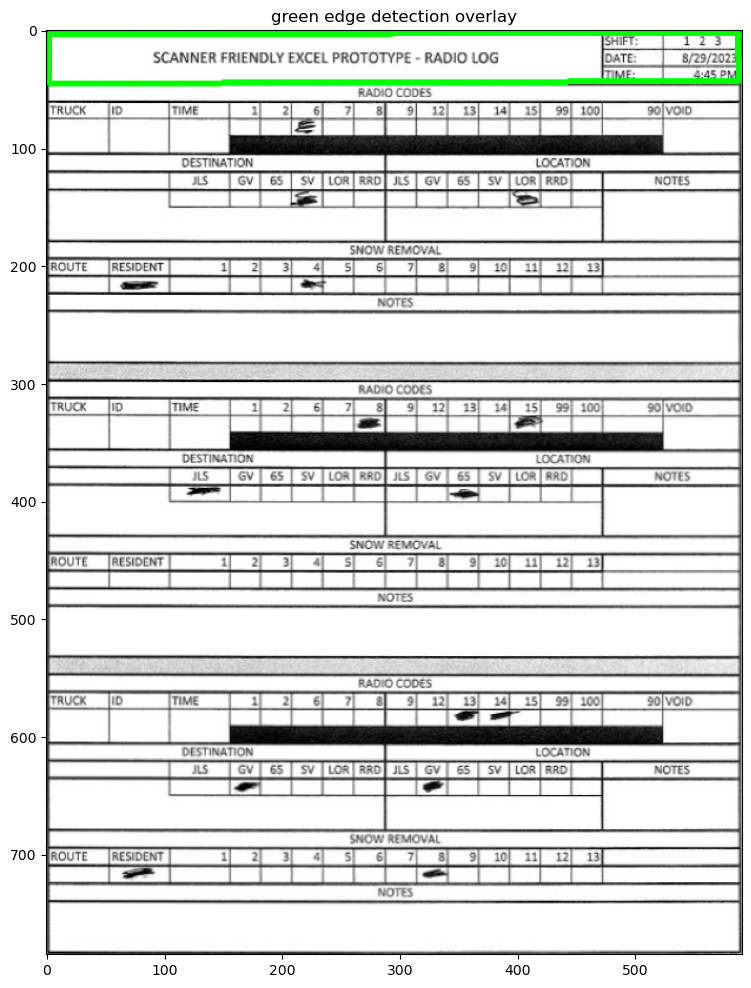

In [12]:
gray_doc = cv2.cvtColor(document, cv2.COLOR_BGR2GRAY)
blur_doc = cv2.GaussianBlur(gray_doc, (5, 5), 0)
edge_doc = cv2.Canny(blur_doc, 10, 70)
contours, _ = cv2.findContours(edge_doc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rect_cnts = get_rect_cnts(contours)
# outline of the questions
biggest_cnt = rect_cnts[0]
# outline of the grade
grade_cnt = rect_cnts[1]

cv2.drawContours(document, rect_cnts[:1], -1, green, 3)
plt.imshow(document)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay')
plt.show()

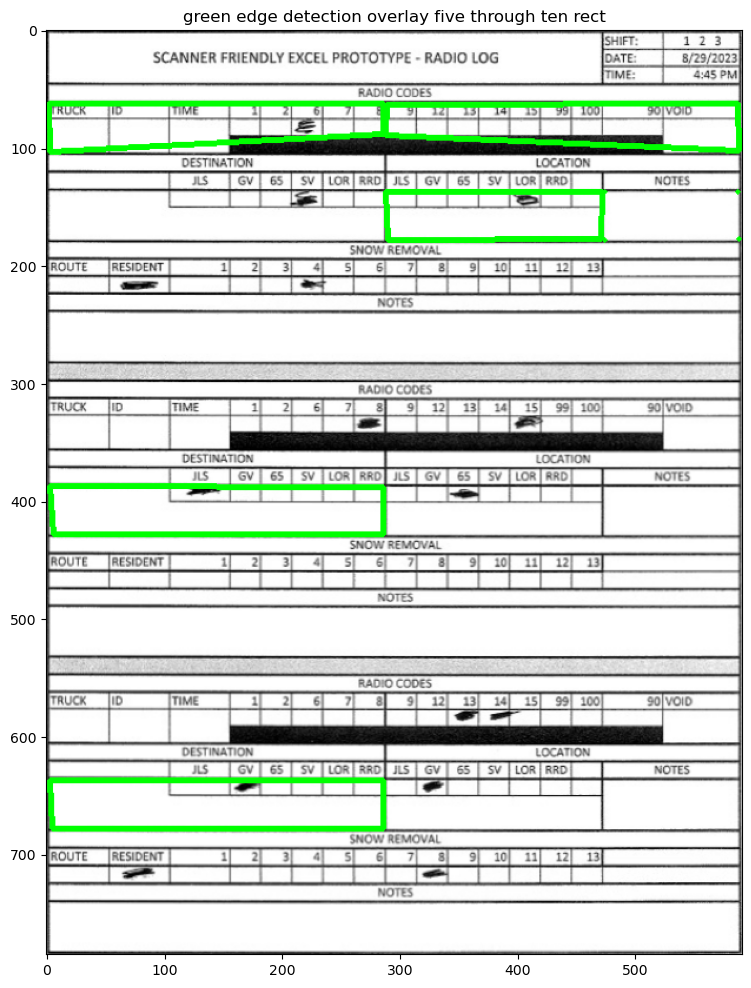

In [16]:
gray_doc = cv2.cvtColor(document1, cv2.COLOR_BGR2GRAY)
blur_doc = cv2.GaussianBlur(gray_doc, (5, 5), 0)
edge_doc = cv2.Canny(blur_doc, 10, 70)
contours, _ = cv2.findContours(edge_doc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rect_cnts = get_rect_cnts(contours)
# outline of the questions
biggest_cnt = rect_cnts[0]
# outline of the grade
grade_cnt = rect_cnts[1]

cv2.drawContours(document1, rect_cnts[4:9], -1, green, 3)
plt.imshow(document1)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay five through ten rect')
plt.show()

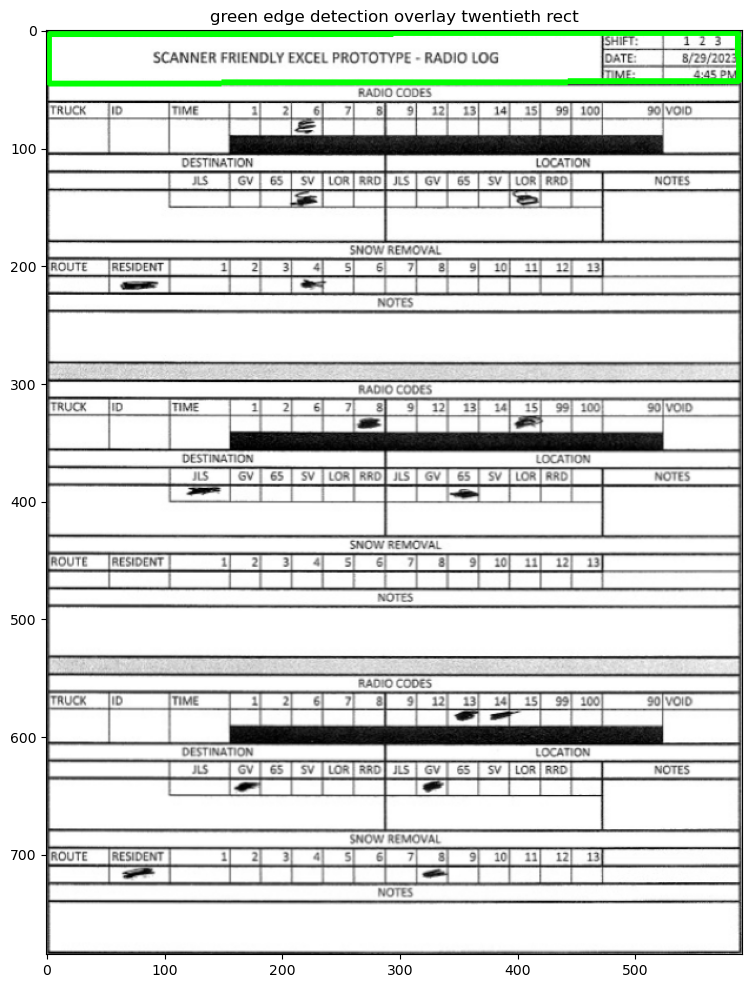

In [14]:
gray_doc = cv2.cvtColor(document2, cv2.COLOR_BGR2GRAY)
blur_doc = cv2.GaussianBlur(gray_doc, (5, 5), 0)
edge_doc = cv2.Canny(blur_doc, 10, 70)
contours, _ = cv2.findContours(edge_doc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rect_cnts = get_rect_cnts(contours)
# outline of the questions
biggest_cnt = rect_cnts[0]
# outline of the grade
grade_cnt = rect_cnts[1]

cv2.drawContours(document2, rect_cnts[19], -1, green, 3)
plt.imshow(document)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay twentieth rect')
plt.show()

In [15]:
#rect_cnts